<a href="https://colab.research.google.com/github/EphemeralAnarchist/Projects/blob/main/Cartoon-ize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving woman-6328478_960_720.jpg to woman-6328478_960_720.jpg
{'woman-6328478_960_720.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x02\xd0\x02\xd0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00

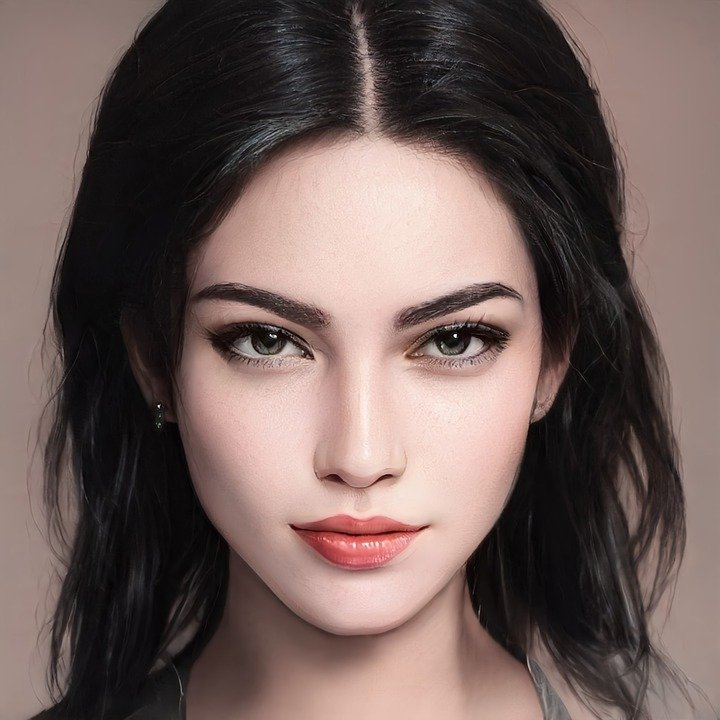

In [1]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
from google.colab import files

uploaded = files.upload()
print(uploaded)
filename = next(iter(uploaded))
img = cv2.imread(filename)
cv2_imshow(img)

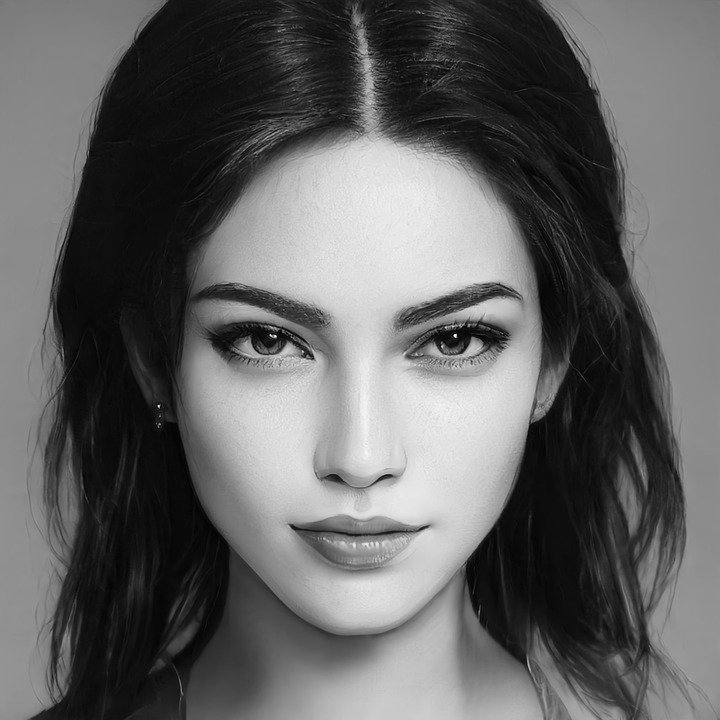

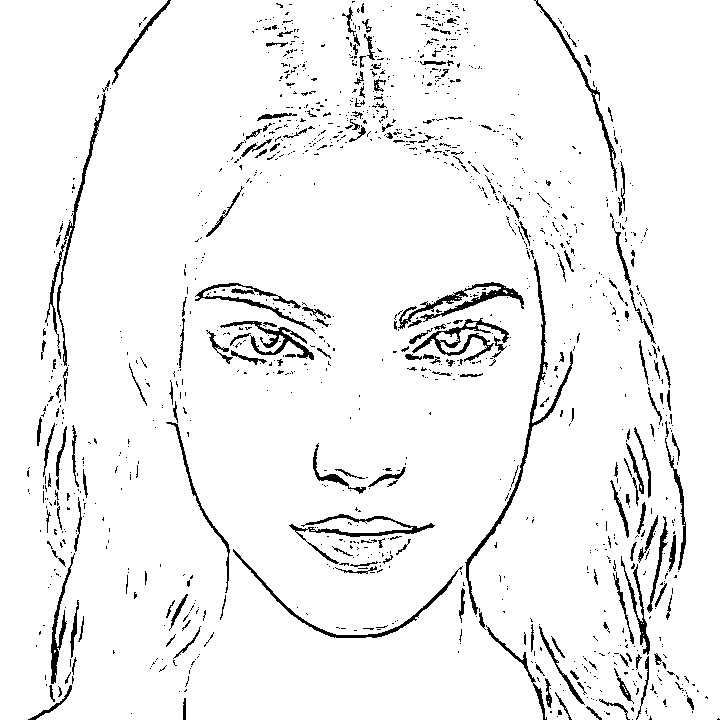

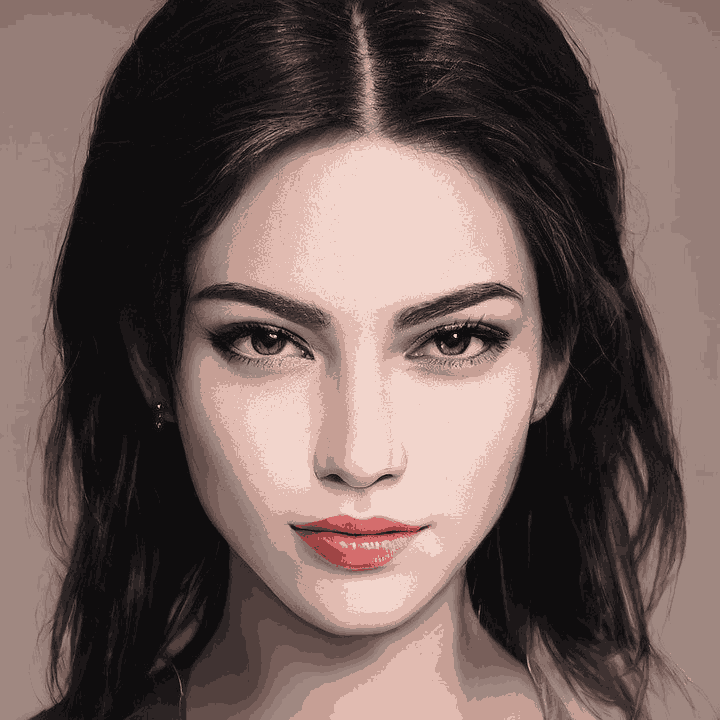

In [2]:
def edge_mask(img, line_size, blur):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray)
  gray_blur = cv2.medianBlur(gray, blur)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur)
  return edges

line_size=7
blur_value=5

edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

def color_quant(img, k):
  data = np.float32(img).reshape((-1, 3))

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

total_color = 15
img = color_quant(img, total_color)
cv2_imshow(img)

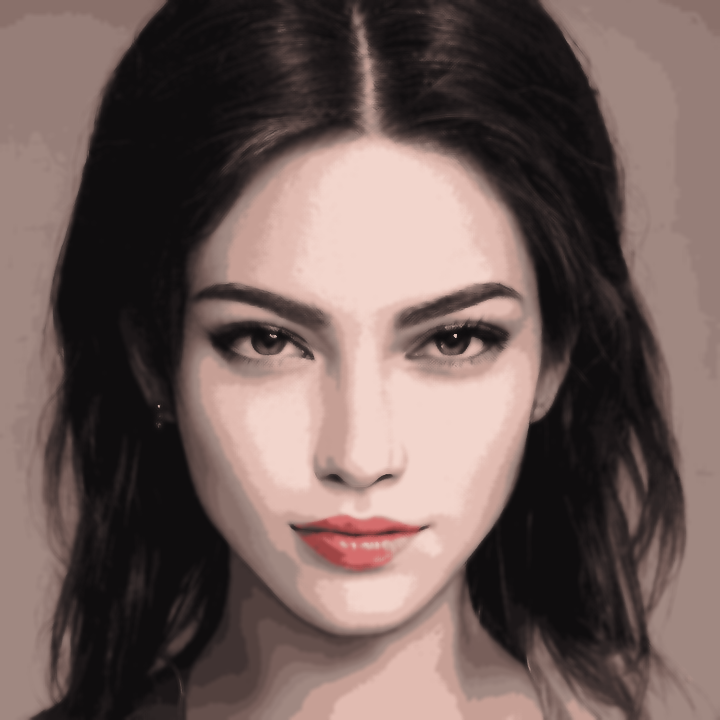

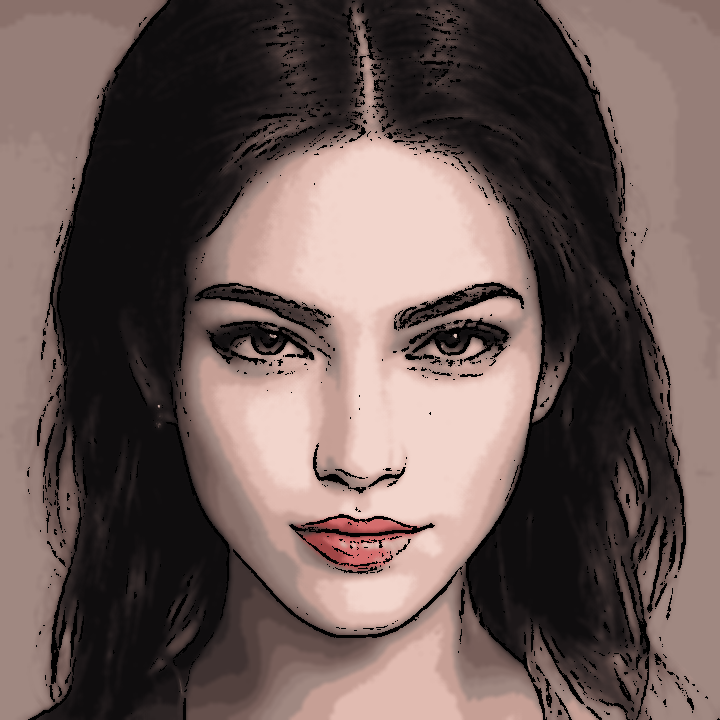

In [3]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200, sigmaSpace=200)
cv2_imshow(blurred)

cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)